## Курсовая работа

In [107]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from pylab import rcParams
import random
from datetime import date
%matplotlib inline
from sklearn.model_selection import train_test_split, KFold, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score as r2

In [108]:
def evaluate_preds(train_true_values, train_pred_values, test_true_values, test_pred_values):
    print("Train R2:\t" + str(round(r2(train_true_values, train_pred_values), 3)))
    print("Test R2:\t" + str(round(r2(test_true_values, test_pred_values), 3)))
    
    plt.figure(figsize=(18,10))
    
    plt.subplot(121)
    sns.scatterplot(x=train_pred_values, y=train_true_values)
    plt.xlabel('Predicted values')
    plt.ylabel('True values')
    plt.title('Train sample prediction')
    
    plt.subplot(122)
    sns.scatterplot(x=test_pred_values, y=test_true_values)
    plt.xlabel('Predicted values')
    plt.ylabel('True values')
    plt.title('Test sample prediction')

    plt.show()


### 1 - Обзор обучающего датасета

In [109]:
train_df = pd.read_csv('C:/Users/ilyas/Desktop/train.CSV')
test_df = pd.read_csv('C:/Users/ilyas/Desktop/test.CSV')

### Фичи
#### Id - идентификационный номер квартиры
#### DistrictId - идентификационный номер района
#### Rooms - количество комнат
#### Square - площадь
#### LifeSquare - жилая площадь
#### KitchenSquare - площадь кухни
#### Floor - этаж
#### HouseFloor - количество этажей в доме
#### HouseYear - год постройки дома
#### Ecology_1, Ecology_2, Ecology_3 - экологические показатели местности
#### Social_1, Social_2, Social_3 - социальные показатели местности
#### Healthcare_1, Helthcare_2 - показатели местности, связанные с охраной здоровья
#### Shops_1, Shops_2 - показатели, связанные с наличием магазинов, торговых центров
#### Price - цена квартиры

In [110]:
train_df.describe()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Price
count,10000.00000,10000.000000,10000.000000,10000.000000,7887.000000,10000.000000,10000.000000,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,5202.000000,10000.000000,10000.000000,10000.000000
mean,8383.40770,50.400800,1.890500,56.315775,37.199645,6.273300,8.526700,12.609400,3.990166e+03,0.118858,24.687000,5352.157400,8.039200,1142.904460,1.319500,4.231300,214138.857399
std,4859.01902,43.587592,0.839512,21.058732,86.241209,28.560917,5.241148,6.775974,2.005003e+05,0.119025,17.532614,4006.799803,23.831875,1021.517264,1.493601,4.806341,92872.293865
min,0.00000,0.000000,0.000000,1.136859,0.370619,0.000000,1.000000,0.000000,1.910000e+03,0.000000,0.000000,168.000000,0.000000,0.000000,0.000000,0.000000,59174.778028
25%,4169.50000,20.000000,1.000000,41.774881,22.769832,1.000000,4.000000,9.000000,1.974000e+03,0.017647,6.000000,1564.000000,0.000000,350.000000,0.000000,1.000000,153872.633942
50%,8394.50000,36.000000,2.000000,52.513310,32.781260,6.000000,7.000000,13.000000,1.977000e+03,0.075424,25.000000,5285.000000,2.000000,900.000000,1.000000,3.000000,192269.644879
75%,12592.50000,75.000000,2.000000,65.900625,45.128803,9.000000,12.000000,17.000000,2.001000e+03,0.195781,36.000000,7227.000000,5.000000,1548.000000,2.000000,6.000000,249135.462171
max,16798.00000,209.000000,19.000000,641.065193,7480.592129,2014.000000,42.000000,117.000000,2.005201e+07,0.521867,74.000000,19083.000000,141.000000,4849.000000,6.000000,23.000000,633233.466570


In [111]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             10000 non-null  int64  
 1   DistrictId     10000 non-null  int64  
 2   Rooms          10000 non-null  float64
 3   Square         10000 non-null  float64
 4   LifeSquare     7887 non-null   float64
 5   KitchenSquare  10000 non-null  float64
 6   Floor          10000 non-null  int64  
 7   HouseFloor     10000 non-null  float64
 8   HouseYear      10000 non-null  int64  
 9   Ecology_1      10000 non-null  float64
 10  Ecology_2      10000 non-null  object 
 11  Ecology_3      10000 non-null  object 
 12  Social_1       10000 non-null  int64  
 13  Social_2       10000 non-null  int64  
 14  Social_3       10000 non-null  int64  
 15  Healthcare_1   5202 non-null   float64
 16  Helthcare_2    10000 non-null  int64  
 17  Shops_1        10000 non-null  int64  
 18  Shops_2

In [112]:
train_df.tail()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
9995,1260,61,2.0,49.090728,33.272626,6.0,3,12.0,1981,0.300323,B,B,52,10311,6,NaN,1,9,B,119367.455796
9996,16265,27,2.0,64.307684,37.038420,9.0,13,0.0,1977,0.072158,B,B,2,629,1,NaN,0,0,A,199715.148807
9997,2795,178,1.0,29.648057,16.555363,5.0,3,5.0,1958,0.460556,B,B,20,4386,14,NaN,1,5,B,165953.912580
9998,14561,21,1.0,32.330292,22.326870,5.0,3,9.0,1969,0.194489,B,B,47,8004,3,125.0,3,5,B,171842.411855
9999,7202,94,1.0,35.815476,22.301367,6.0,9,9.0,1975,0.127376,B,B,43,8429,3,NaN,3,9,B,177685.627486


In [113]:
len(train_df) - train_df.count()

Id                  0
DistrictId          0
Rooms               0
Square              0
LifeSquare       2113
KitchenSquare       0
Floor               0
HouseFloor          0
HouseYear           0
Ecology_1           0
Ecology_2           0
Ecology_3           0
Social_1            0
Social_2            0
Social_3            0
Healthcare_1     4798
Helthcare_2         0
Shops_1             0
Shops_2             0
Price               0
dtype: int64

### 2 - EDA и очистка данных

#### Посмотрим распределение целевой переменной

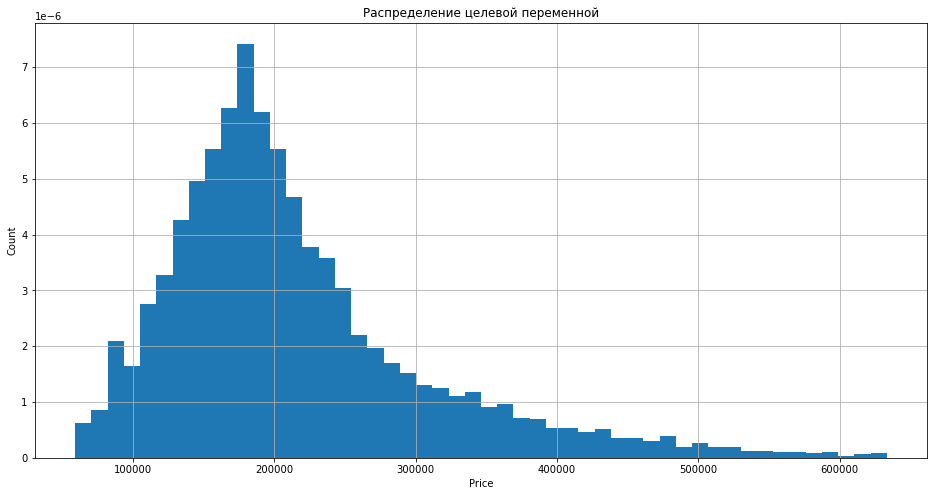

In [114]:
plt.figure(figsize=(16, 8))
train_df['Price'].hist(density=True, bins=50)
plt.xlabel('Price')
plt.ylabel('Count')
plt.title('Распределение целевой переменной')
plt.show()

C:\Users\ilyas\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


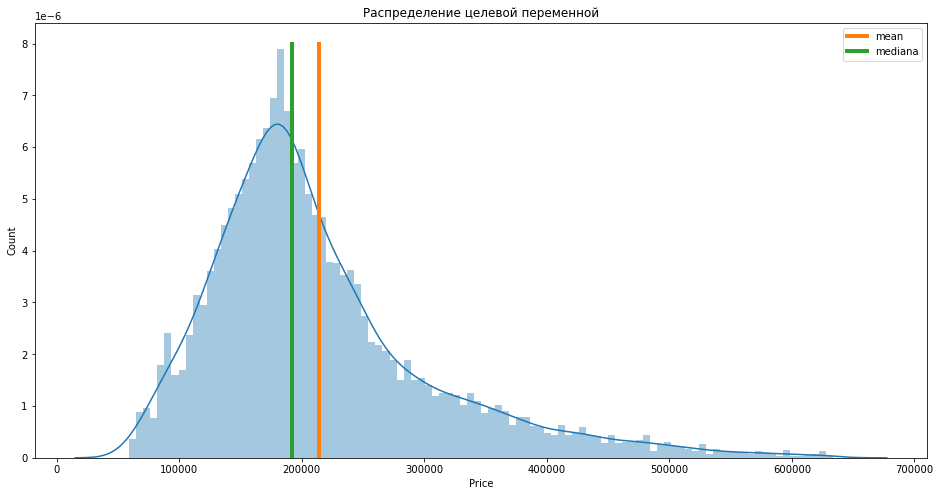

In [115]:
plt.figure(figsize=(16, 8))

sns.distplot(train_df['Price'], bins=100)

y = np.linspace(0, 0.000008, 10)
plt.plot([train_df['Price'].mean()] * 10, y, label = 'mean', linewidth = 4)
plt.plot([train_df['Price'].median()] * 10, y, label = 'mediana', linewidth = 4)

plt.xlabel('Price')
plt.ylabel('Count')
plt.title('Распределение целевой переменной')
plt.legend()
plt.show()

#### Посмотрим распределение фичей

In [116]:
train_df['Id'] = train_df['Id'].astype(str)

In [117]:
train_df.columns

Index(['Id', 'DistrictId', 'Rooms', 'Square', 'LifeSquare', 'KitchenSquare',
       'Floor', 'HouseFloor', 'HouseYear', 'Ecology_1', 'Ecology_2',
       'Ecology_3', 'Social_1', 'Social_2', 'Social_3', 'Healthcare_1',
       'Helthcare_2', 'Shops_1', 'Shops_2', 'Price'],
      dtype='object')

In [118]:
features = pd.DataFrame(train_df.drop('Price', axis=1), columns = ['Id', 'DistrictId', 'Rooms', 'Square', 'LifeSquare', 'KitchenSquare',
       'Floor', 'HouseFloor', 'HouseYear', 'Ecology_1', 'Ecology_2',
       'Ecology_3', 'Social_1', 'Social_2', 'Social_3', 'Healthcare_1',
       'Helthcare_2', 'Shops_1', 'Shops_2'])
features

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2
0,11809,27,3.0,115.027311,NaN,10.0,4,10.0,2014,0.075424,B,B,11,3097,0,NaN,0,0,B
1,3013,22,1.0,39.832524,23.169223,8.0,7,8.0,1966,0.118537,B,B,30,6207,1,1183.0,1,0,B
2,8215,1,3.0,78.342215,47.671972,10.0,2,17.0,1988,0.025609,B,B,33,5261,0,240.0,3,1,B
3,2352,1,1.0,40.409907,NaN,1.0,10,22.0,1977,0.007122,B,B,1,264,0,NaN,0,1,B
4,13866,94,2.0,64.285067,38.562517,9.0,16,16.0,1972,0.282798,B,B,33,8667,2,NaN,0,6,B
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1260,61,2.0,49.090728,33.272626,6.0,3,12.0,1981,0.300323,B,B,52,10311,6,NaN,1,9,B
9996,16265,27,2.0,64.307684,37.038420,9.0,13,0.0,1977,0.072158,B,B,2,629,1,NaN,0,0,A
9997,2795,178,1.0,29.648057,16.555363,5.0,3,5.0,1958,0.460556,B,B,20,4386,14,NaN,1,5,B
9998,14561,21,1.0,32.330292,22.326870,5.0,3,9.0,1969,0.194489,B,B,47,8004,3,125.0,3,5,B


In [119]:
features = features.drop('Id', axis=1)

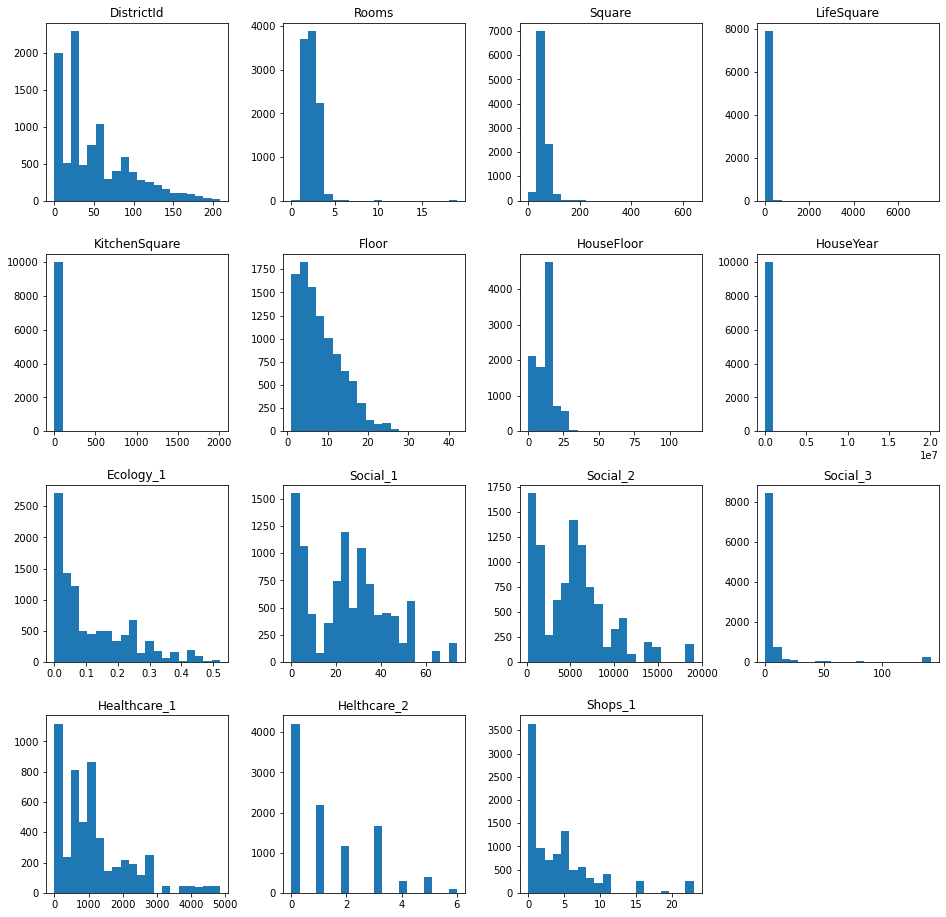

In [120]:
features.hist(figsize=(16,16), bins= 20, grid=False);

### 3 - Приведение данных
#### ROOMS

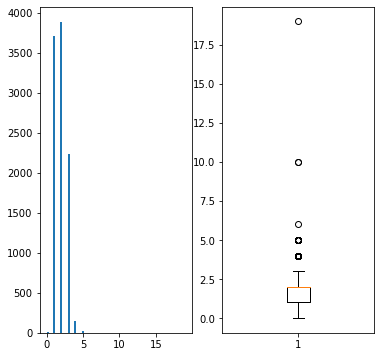

In [121]:
fig, ax = plt.subplots(nrows=1, ncols=2)
ax1, ax2 = ax.flatten()
ax1.hist(features['Rooms'], bins = 70)
ax2.boxplot(features['Rooms'], whis=1.5)
fig.set_size_inches(6,6)
plt.show()

In [122]:
features['Rooms'].value_counts()

2.0     3880
1.0     3705
3.0     2235
4.0      150
5.0       18
0.0        8
10.0       2
19.0       1
6.0        1
Name: Rooms, dtype: int64

In [123]:
features.loc[(features['Rooms'] > 6) | (features['Rooms'] < 1), 'Rooms'] = features['Rooms'].median()

#### KitchenSquare

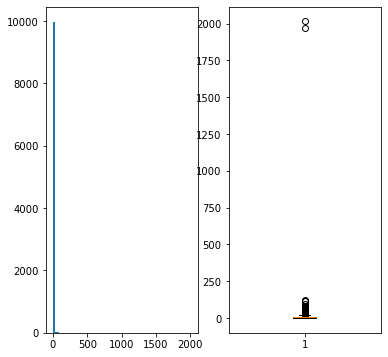

In [124]:
fig, ax = plt.subplots(nrows=1, ncols=2)
ax1, ax2 = ax.flatten()
ax1.hist(features['KitchenSquare'], bins = 70)
ax2.boxplot(features['KitchenSquare'], whis=1.5)
fig.set_size_inches(6,6)
plt.show()

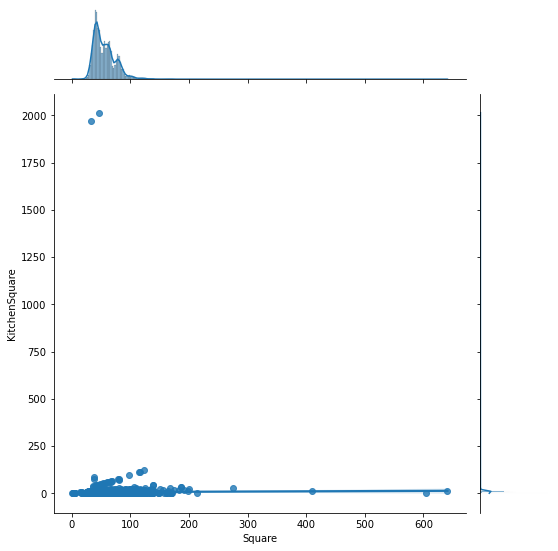

In [125]:
grid = sns.jointplot(x = features['Square'], y = features['KitchenSquare'], kind='reg')
grid.fig.set_figwidth(8)
grid.fig.set_figheight(8)
plt.show()

In [126]:
features.loc[((features['KitchenSquare'] < features['KitchenSquare'].quantile(0.25)) | 
             (features['KitchenSquare'] > features['KitchenSquare'].quantile(0.975))) | ((features['KitchenSquare'] < features['KitchenSquare'].median()) & 
(features['KitchenSquare'] < features['KitchenSquare'].mean())), 'KitchenSquare'] = features['KitchenSquare'].mean()

#### Square

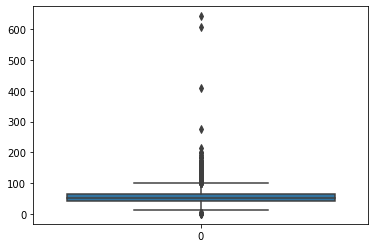

In [127]:
sns.boxplot(data=features['Square'], whis=1.5)
plt.show()

In [128]:
intr_qr = features['Square'].quantile(.75) - features['Square'].quantile(.25)
upper1 = features['Square'].quantile(.75) + (intr_qr * 1.5)
lower1 = features['Square'].quantile(.25) - (intr_qr * 1.5)
upper1, lower1

(102.08924188493728, 5.586264180189367)

In [129]:
features['Square'].mean(),features['Square'].median()

(56.315775197935615, 52.51330992401352)

In [130]:
features.loc[features['Square'] < lower1, 'Square'] = features['Square'].median()
features.loc[features['Square'] > upper1, 'Square'] = features['Square'].mean()

#### LifeSquare

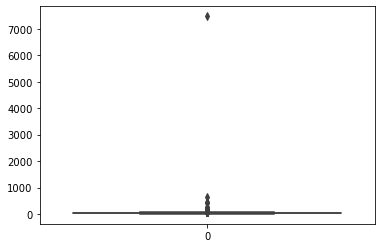

In [131]:
sns.boxplot(data=features['LifeSquare'], whis=1.5)
plt.show()

In [132]:
intr_qr = features['LifeSquare'].quantile(.75) - features['LifeSquare'].quantile(.25)
upper2 = features['LifeSquare'].quantile(.75) + (intr_qr * 1.5)
lower2 = features['LifeSquare'].quantile(.25) - (intr_qr * 1.5)
upper2, lower2

(78.66725866176199, -10.76862370672341)

In [133]:
features.loc[features['LifeSquare'] > upper2, 'LifeSquare'] = features['LifeSquare'].median()

In [134]:
features.loc[(features['LifeSquare'] > features['Square']) | (features['LifeSquare'].isna()), 'LifeSquare'] = (features['Square'] - features['KitchenSquare']) - 4

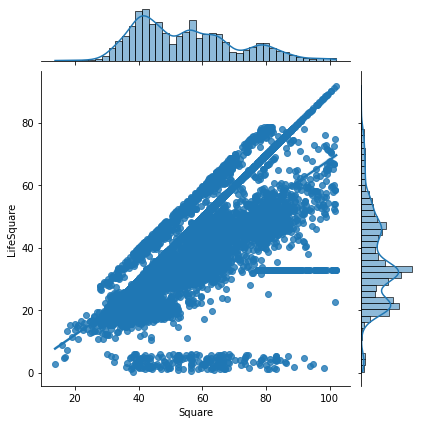

In [135]:
sns.jointplot(x = features['Square'], y = features['LifeSquare'], kind='reg')
plt.show()

#### Floor and HouseFlore

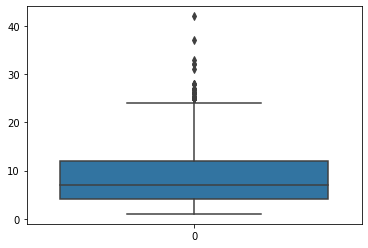

In [136]:
sns.boxplot(data=features['Floor'], whis=1.5)
plt.show()

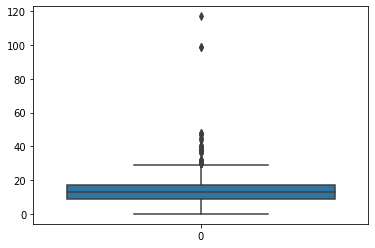

In [137]:
sns.boxplot(data=features['HouseFloor'], whis = 1.5)
plt.show()

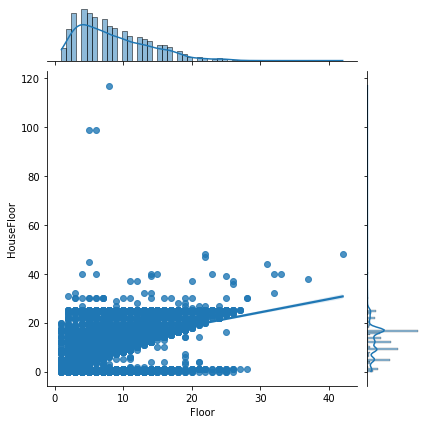

In [138]:
sns.jointplot(x=features['Floor'], y=features['HouseFloor'], kind='reg')

plt.show()

In [139]:
features['Floor'].mean(), features['Floor'].median(),features['Floor'].mode()

(8.5267,
 7.0,
 0    4
 dtype: int64)

In [140]:
features['Floor'].value_counts()

4     949
5     876
3     872
6     802
7     759
8     643
9     604
2     588
10    553
11    457
12    438
13    398
14    362
16    290
15    287
17    256
1     235
18    185
19    121
20     68
21     59
22     54
24     53
25     34
23     25
26     18
27      5
28      3
32      2
31      1
33      1
42      1
37      1
Name: Floor, dtype: int64

In [141]:
(features['Floor'] > features['HouseFloor']).sum()

1825

In [142]:
intr_qr = features['Floor'].quantile(.75) - features['Floor'].quantile(.25)
upper3 = features['Floor'].quantile(.75) + (intr_qr * 1.5)
lower3 = features['Floor'].quantile(.25) - (intr_qr * 1.5)
upper3, lower3

(24.0, -8.0)

In [143]:
features.loc[features['Floor'] > upper3, 'Floor'] = features['Floor'].median()

In [144]:
intr_qr = features['HouseFloor'].quantile(.75) - features['HouseFloor'].quantile(.25)
upper4 = features['HouseFloor'].quantile(.75) + (intr_qr * 1.5)
lower4 = features['HouseFloor'].quantile(.25) - (intr_qr * 1.5)
upper4, lower4

(29.0, -3.0)

In [145]:
features['for_h'] = 0

In [146]:
features.loc[(features['HouseFloor'] > upper4) |(features['HouseFloor'] == 0) , 'HouseFloor'] = features['HouseFloor'].median()

In [147]:
features.loc[(features['Floor'] > features['HouseFloor']) | (features['HouseFloor'] == 0), 'for_h'] = 1

In [148]:
features.loc[features['Floor'] > features['HouseFloor'], 'Floor'] = (features.loc[features['for_h'] == 1, 'HouseFloor']).apply(lambda x: random.randint(1, x))

In [149]:
(features['Floor'] > features['HouseFloor']).sum()

0

In [150]:
features.describe()

,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,for_h
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,5202.000000,10000.000000,10000.000000,10000.000000
mean,50.400800,1.888800,54.743585,36.384201,7.442971,7.310300,12.83120,3.990166e+03,0.118858,24.687000,5352.157400,8.039200,1142.904460,1.319500,4.231300,0.159200
std,43.587592,0.812096,15.858155,14.889737,1.679740,4.895918,6.04946,2.005003e+05,0.119025,17.532614,4006.799803,23.831875,1021.517264,1.493601,4.806341,0.365881
min,0.000000,1.000000,13.784865,0.370619,6.000000,1.000000,1.00000,1.910000e+03,0.000000,0.000000,168.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20.000000,1.000000,41.794392,24.688516,6.273300,3.000000,9.00000,1.974000e+03,0.017647,6.000000,1564.000000,0.000000,350.000000,0.000000,1.000000,0.000000
50%,36.000000,2.000000,52.513580,33.228689,6.273300,6.000000,13.00000,1.977000e+03,0.075424,25.000000,5285.000000,2.000000,900.000000,1.000000,3.000000,0.000000
75%,75.000000,2.000000,64.682943,46.101050,8.000000,10.000000,17.00000,2.001000e+03,0.195781,36.000000,7227.000000,5.000000,1548.000000,2.000000,6.000000,0.000000
max,209.000000,6.000000,102.056968,91.759501,13.000000,24.000000,29.00000,2.005201e+07,0.521867,74.000000,19083.000000,141.000000,4849.000000,6.000000,23.000000,1.000000


#### HouseYear

In [151]:
features['HouseYear'].value_counts()

1977        2652
2017         308
2016         305
2015         299
2014         210
            ... 
1928           1
1910           1
1916           1
4968           1
20052011       1
Name: HouseYear, Length: 97, dtype: int64

In [152]:
features['HouseYear'].mean(), features['HouseYear'].median(), features['HouseYear'].mode()

(3990.1663,
 1977.0,
 0    1977
 dtype: int64)

In [153]:
features.loc[features['HouseYear'] > date.today().year, 'HouseYear'] = features['HouseYear'].median()

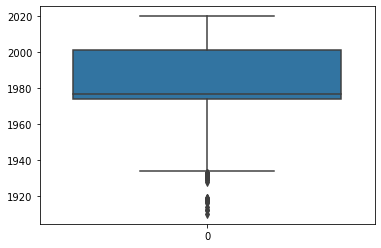

In [154]:
sns.boxplot(data=features['HouseYear'], whis=1.5)
plt.show()

In [155]:
intr_qr = features['HouseYear'].quantile(.75) - features['HouseYear'].quantile(.25)
upper5 = features['HouseYear'].quantile(.75) + (intr_qr * 1.5)
lower5 = features['HouseYear'].quantile(.25) - (intr_qr * 1.5)
upper5, lower5

(2041.5, 1933.5)

In [156]:
features.loc[features['HouseYear'] < lower5, 'HouseYear'] = features['HouseYear'].median()

#### Ecology_1

In [157]:
features['Ecology_1'].mean(), features['Ecology_1'].median(), features['Ecology_1'].mode()

(0.11885751885429463,
 0.07542368,
 0    0.007122
 dtype: float64)

<AxesSubplot:>

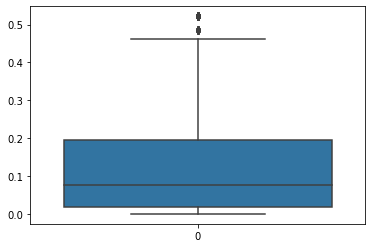

In [158]:
sns.boxplot(data=features['Ecology_1'], whis=1.5)

In [159]:
intr_qr = features['Ecology_1'].quantile(.75) - features['Ecology_1'].quantile(.25)
upper6 = features['Ecology_1'].quantile(.75) + (intr_qr * 1.5)
lower6 = features['Ecology_1'].quantile(.25) - (intr_qr * 1.5)
upper6, lower6

(0.46298205300000006, -0.24955394700000003)

In [160]:
features.loc[features['Ecology_1'] > upper6, 'Ecology_1'] = features['Ecology_1'].mean()

#### Social

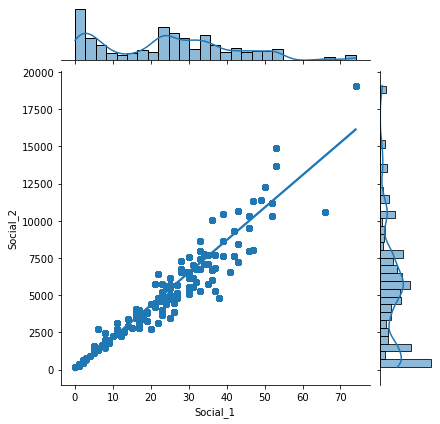

In [161]:
sns.jointplot(x=features['Social_1'], y=features['Social_2'], kind='reg')

plt.show()

#### Healthcare

In [162]:
features.drop('Healthcare_1', axis=1, inplace = True)

#### Построение новых признаков

In [163]:
add_feat = {'A':0, 'B':1}

In [164]:
features['Ecology_2'] = features['Ecology_2'].replace(add_feat)
features['Ecology_3'] = features['Ecology_3'].replace(add_feat)
features['Shops_2'] = features['Shops_2'].replace(add_feat)

In [165]:
features

,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Helthcare_2,Shops_1,Shops_2,for_h
0,27,3.0,56.374350,42.374350,10.0000,4,10.0,2014,0.075424,1,1,11,3097,0,0,0,1,0
1,22,1.0,39.832524,23.169223,8.0000,7,8.0,1966,0.118537,1,1,30,6207,1,1,0,1,0
2,1,3.0,78.342215,47.671972,10.0000,2,17.0,1988,0.025609,1,1,33,5261,0,3,1,1,0
3,1,1.0,40.409907,30.136607,6.2733,10,22.0,1977,0.007122,1,1,1,264,0,0,1,1,0
4,94,2.0,64.285067,38.562517,9.0000,16,16.0,1972,0.282798,1,1,33,8667,2,0,6,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,61,2.0,49.090728,33.272626,6.0000,3,12.0,1981,0.300323,1,1,52,10311,6,1,9,1,0
9996,27,2.0,64.307684,37.038420,9.0000,13,13.0,1977,0.072158,1,1,2,629,1,0,0,0,0
9997,178,1.0,29.648057,16.555363,6.2733,3,5.0,1958,0.460556,1,1,20,4386,14,1,5,1,0
9998,21,1.0,32.330292,22.326870,6.2733,3,9.0,1969,0.194489,1,1,47,8004,3,3,5,1,0


#### Отбор признаков и разбиение модели на train и test

In [166]:
feats = ['DistrictId', 'Rooms', 'Square', 'LifeSquare', 'KitchenSquare', 'Floor', 'HouseFloor', 'HouseYear', 'Ecology_1',
        'Ecology_1', 'Ecology_3', 'Social_1', 'Social_2', 'Social_3', 'Helthcare_2', 'Shops_1', 'Shops_2', 'for_h']

In [167]:
X = features[feats]
y = train_df['Price']

In [168]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [169]:
model = RandomForestRegressor()

In [170]:
params = {'n_estimators' : [50,100,150,200], 'max_depth' : [3,5,7,10,20,30,40]}

In [171]:
final_model = RandomForestRegressor(criterion='mse', max_depth=40, n_estimators= 150, random_state =40)

In [172]:
final_model.fit(X_train, y_train)

RandomForestRegressor(max_depth=40, n_estimators=150, random_state=40)

In [173]:
y_train_preds = final_model.predict(X_train)

In [174]:
y_test_preds = final_model.predict(X_test)

Train R2:	0.961
Test R2:	0.72


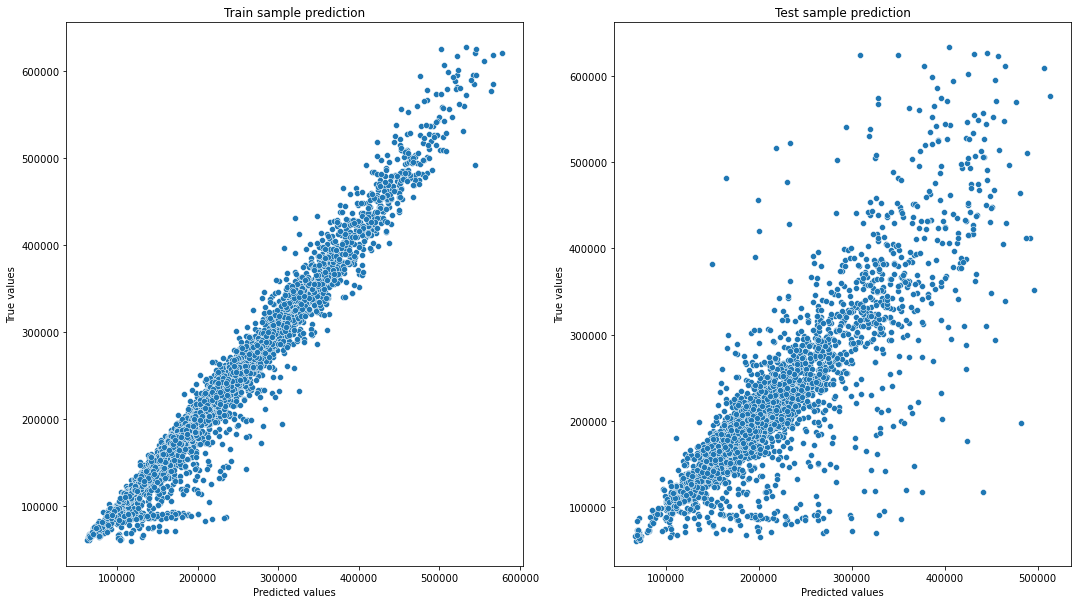

In [175]:
evaluate_preds(y_train, y_train_preds, y_test, y_test_preds)

#### Подготовка test

#### Rooms

In [176]:
test_df.loc[(test_df['Rooms'] > 6) | (test_df['Rooms'] < 1), 'Rooms'] = test_df['Rooms'].median()

#### KitchenSquare

In [177]:
test_df.loc[((test_df['KitchenSquare'] < test_df['KitchenSquare'].quantile(0.25)) | 
             (test_df['KitchenSquare'] > test_df['KitchenSquare'].quantile(0.975))) | ((test_df['KitchenSquare'] < test_df['KitchenSquare'].median()) & 
(test_df['KitchenSquare'] < test_df['KitchenSquare'].mean())), 'KitchenSquare'] = test_df['KitchenSquare'].mean()

#### Square

In [178]:
intr_qr = test_df['Square'].quantile(.75) - test_df['Square'].quantile(.25)
upper1 = test_df['Square'].quantile(.75) + (intr_qr * 1.5)
lower1 = test_df['Square'].quantile(.25) - (intr_qr * 1.5)
upper1, lower1

(102.85347643285048, 5.337883253363636)

In [179]:
test_df.loc[test_df['Square'] < lower1, 'Square'] = test_df['Square'].median()
test_df.loc[test_df['Square'] > upper1, 'Square'] = test_df['Square'].mean()

#### LifeSquare

In [180]:
intr_qr = test_df['LifeSquare'].quantile(.75) - test_df['LifeSquare'].quantile(.25)
upper2 = test_df['LifeSquare'].quantile(.75) + (intr_qr * 1.5)
lower2 = test_df['LifeSquare'].quantile(.25) - (intr_qr * 1.5)
upper2, lower2

(78.29718906362993, -10.031071759483911)

In [181]:
test_df.loc[test_df['LifeSquare'] > upper2, 'LifeSquare'] = test_df['LifeSquare'].median()

In [182]:
test_df.loc[(test_df['LifeSquare'] > test_df['Square']) | (test_df['LifeSquare'].isna()), 'LifeSquare'] = (test_df['Square'] - test_df['KitchenSquare']) - 4

#### Floor and HouseFlore

In [183]:
intr_qr = test_df['Floor'].quantile(.75) - test_df['Floor'].quantile(.25)
upper3 = test_df['Floor'].quantile(.75) + (intr_qr * 1.5)
lower3 = test_df['Floor'].quantile(.25) - (intr_qr * 1.5)
upper3, lower3

(24.0, -8.0)

In [184]:
intr_qr = test_df['HouseFloor'].quantile(.75) - test_df['HouseFloor'].quantile(.25)
upper4 = test_df['HouseFloor'].quantile(.75) + (intr_qr * 1.5)
lower4 = test_df['HouseFloor'].quantile(.25) - (intr_qr * 1.5)
upper4, lower4

(29.0, -3.0)

In [185]:
test_df.loc[test_df['Floor'] > upper3, 'Floor'] = test_df['Floor'].median()

In [186]:
test_df['for_h'] = 0

In [187]:
test_df.loc[(test_df['HouseFloor'] > upper4) |(test_df['HouseFloor'] == 0) , 'HouseFloor'] = test_df['HouseFloor'].median()

In [188]:
test_df.loc[(test_df['Floor'] > test_df['HouseFloor']) | (test_df['HouseFloor'] == 0), 'for_h'] = 1

In [189]:
test_df.loc[test_df['Floor'] > test_df['HouseFloor'], 'Floor'] = (test_df.loc[test_df['for_h'] == 1, 'HouseFloor']).apply(lambda x: random.randint(1, x))

#### HouseYear

In [190]:
intr_qr = test_df['HouseYear'].quantile(.75) - test_df['HouseYear'].quantile(.25)
upper5 = test_df['HouseYear'].quantile(.75) + (intr_qr * 1.5)
lower5 = test_df['HouseYear'].quantile(.25) - (intr_qr * 1.5)
upper5, lower5

(2040.5, 1932.5)

In [191]:
test_df.loc[test_df['HouseYear'] > date.today().year, 'HouseYear'] = test_df['HouseYear'].median()

In [192]:
test_df.loc[test_df['HouseYear'] < lower5, 'HouseYear'] = test_df['HouseYear'].median()

#### Ecology_1

In [193]:
intr_qr = test_df['Ecology_1'].quantile(.75) - test_df['Ecology_1'].quantile(.25)
upper6 = test_df['Ecology_1'].quantile(.75) + (intr_qr * 1.5)
lower6 = test_df['Ecology_1'].quantile(.25) - (intr_qr * 1.5)
upper6, lower6

(0.46018943850000005, -0.24489958950000001)

In [194]:
test_df.loc[features['Ecology_1'] > upper6, 'Ecology_1'] = test_df['Ecology_1'].mean()

#### Healthcare

In [195]:
test_df.drop('Healthcare_1', axis=1, inplace = True)

#### Новые фичи

In [196]:
test_df['Ecology_2'] = test_df['Ecology_2'].replace(add_feat)
test_df['Ecology_3'] = test_df['Ecology_3'].replace(add_feat)
test_df['Shops_2'] = test_df['Shops_2'].replace(add_feat)

#### Итоговый тест

In [197]:
final_model.fit(X,y)

RandomForestRegressor(max_depth=40, n_estimators=150, random_state=40)

In [198]:
result = test_df[feats]
pd.DataFrame(final_model.predict(result), columns=['Predict'])

,Predict
0,159593.752529
1,121912.704629
2,139682.441653
3,137502.755124
4,217255.360673
...,...
4995,174052.701824
4996,402883.326294
4997,140053.218564
4998,194500.951222
